#### Research on seattle collisions!! Data provided by SPD

###### data from here ---> https://data.seattle.gov/dataset/SDOT-Collisions-All-Years/79xi-y524

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer #https://data.seattle.gov/dataset/SDOT-Collisions-All-Years/79xi-y524

## this line disables a warning i ran into
#pd.options.mode.chained_assignment = None  # default='warn' 

data_frame = pd.read_csv('C:/Users/aaron/Code/Data/SDOT_Collisions_All_Years.csv', parse_dates=[46,47])

###46 and 47 are 'Added Date' and 'Modified Date'


pd.set_option('display.max_columns', None) ### This line makes all the columns display, rather than ellipses shorten


data_frame.head()

C:\Users\aaron\AppData\Local\Temp\ipykernel_38136\2468176636.py:8: DtypeWarning: Columns (28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('C:/Users/aaron/Code/Data/SDOT_Collisions_All_Years.csv', parse_dates=[46,47])


,X,Y,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,DIAGRAMLINK,REPORTLINK,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SPDCASENO,SOURCE,SOURCEDESC,ADDDTTM,MODDTTM
0,1.286845e+06,187906.793603,29494934,NaN,363919,365399,3904281,Matched,Block,NaN,S BANGOR ST BETWEEN 55TH AVE S AND 56TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2023/06/14 00:00:00+00,6/14/2023 11:07:00 AM,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,N,Overcast,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,32.0,One parked--one moving,0,0,N,2023-165460,PTCR,Police Traffic Collision Report,2023-08-03 00:00:00+00:00,2023-11-14 00:00:00+00:00
1,1.274850e+06,251108.876844,29494935,NaN,363504,364984,ED70872,Matched,Intersection,24475.0,ROOSEVELT WAY NE AND NE 69TH ST,NaN,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2023/06/16 00:00:00+00,6/16/2023 2:47:00 PM,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,6.0,Pedalcyclist Strikes Moving Vehicle,0,0,N,2023-167905,PTCR,Police Traffic Collision Report,2023-07-20 00:00:00+00:00,2023-11-14 00:00:00+00:00
2,1.273323e+06,268959.557678,29494936,NaN,363441,364921,ED39707,Matched,Block,NaN,4TH AVE NE BETWEEN DEAD END 3 AND NE 136TH ST,NaN,NaN,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2023/03/01 00:00:00+00,3/1/2023 12:20:00 AM,Mid-Block (not related to intersection),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,N,Fog/Smog/Smoke,Dry,Dark - Street Lights Off,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,Y,50.0,Fixed object,0,0,N,NaN,PTCR,Police Traffic Collision Report,2023-07-18 00:00:00+00:00,2023-07-27 00:00:00+00:00
3,1.283008e+06,192630.813355,29494937,NaN,367274,368754,3893040,Unmatched,Block,NaN,M L KING JR WR WAY S BETWEEN BEACON AVE S AND ...,NaN,NaN,1,Property Damage Only Collision,NaN,3,0,0,0,0,0,0,2023/11/11 00:00:00+00,11/11/2023,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,NaN,NaN,0,0,N,NaN,PTCR,Police Traffic Collision Report,2023-11-15 00:00:00+00:00,2023-11-15 00:00:00+00:00
4,1.270485e+06,229220.731973,29494938,NaN,363314,364794,ED34356,Matched,Intersection,158088.0,DENNY WAY AND MINOR AVE,NaN,NaN,2,Injury Collision,Angles,4,0,0,2,4,0,0,2023/02/14 00:00:00+00,2/14/2023 1:59:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,10.0,Entering at angle,0,0,N,2023-043295,PTCR,Police Traffic Collision Report,2023-07-13 00:00:00+00:00,2023-07-18 00:00:00+00:00


In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245802 entries, 0 to 245801
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   X                 237827 non-null  float64            
 1   Y                 237827 non-null  float64            
 2   OBJECTID          245802 non-null  int64              
 3   SE_ANNO_CAD_DATA  0 non-null       float64            
 4   INCKEY            245802 non-null  int64              
 5   COLDETKEY         245802 non-null  int64              
 6   REPORTNO          245802 non-null  object             
 7   STATUS            245802 non-null  object             
 8   ADDRTYPE          241880 non-null  object             
 9   INTKEY            81759 non-null   float64            
 10  LOCATION          240948 non-null  object             
 11  EXCEPTRSNCODE     12717 non-null   object             
 12  EXCEPTRSNDESC     12717 non-null   object   

In [3]:
small_df = data_frame.head(20)

In [4]:
#x1 = 1.283008e+06
#y1 = 192630.813355

def epsg_to_latlong(x, y):
    #### the two values below are both EPSG values. 2285 represents the seattle area and 4326 represents the Lat/Long system (I think)
    transformer = Transformer.from_crs(2285,4326)    
    x,y = transformer.transform(x, y)
    return x,y


data_frame[['Latitude', 'Longitude']] = data_frame.apply(lambda a: epsg_to_latlong(a['X'], a['Y']), axis='columns', result_type='expand')


data_frame.head()


,X,Y,OBJECTID,SE_ANNO_CAD_DATA,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,DIAGRAMLINK,REPORTLINK,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,SPDCASENO,SOURCE,SOURCEDESC,ADDDTTM,MODDTTM,Latitude,Longitude
0,1.286845e+06,187906.793603,29494934,NaN,363919,365399,3904281,Matched,Block,NaN,S BANGOR ST BETWEEN 55TH AVE S AND 56TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,2023/06/14 00:00:00+00,6/14/2023 11:07:00 AM,Mid-Block (not related to intersection),16.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,N,Overcast,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,32.0,One parked--one moving,0,0,N,2023-165460,PTCR,Police Traffic Collision Report,2023-08-03 00:00:00+00:00,2023-11-14 00:00:00+00:00,47.506127,-122.263950
1,1.274850e+06,251108.876844,29494935,NaN,363504,364984,ED70872,Matched,Intersection,24475.0,ROOSEVELT WAY NE AND NE 69TH ST,NaN,NaN,2,Injury Collision,Cycles,2,0,1,1,1,0,0,2023/06/16 00:00:00+00,6/16/2023 2:47:00 PM,At Intersection (intersection related),18.0,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",NaN,N,Clear,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,6.0,Pedalcyclist Strikes Moving Vehicle,0,0,N,2023-167905,PTCR,Police Traffic Collision Report,2023-07-20 00:00:00+00:00,2023-11-14 00:00:00+00:00,47.678741,-122.317403
2,1.273323e+06,268959.557678,29494936,NaN,363441,364921,ED39707,Matched,Block,NaN,4TH AVE NE BETWEEN DEAD END 3 AND NE 136TH ST,NaN,NaN,1,Property Damage Only Collision,Other,1,0,0,1,0,0,0,2023/03/01 00:00:00+00,3/1/2023 12:20:00 AM,Mid-Block (not related to intersection),26.0,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,N,Fog/Smog/Smoke,Dry,Dark - Street Lights Off,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,Y,50.0,Fixed object,0,0,N,NaN,PTCR,Police Traffic Collision Report,2023-07-18 00:00:00+00:00,2023-07-27 00:00:00+00:00,47.727589,-122.325004
3,1.283008e+06,192630.813355,29494937,NaN,367274,368754,3893040,Unmatched,Block,NaN,M L KING JR WR WAY S BETWEEN BEACON AVE S AND ...,NaN,NaN,1,Property Damage Only Collision,NaN,3,0,0,0,0,0,0,2023/11/11 00:00:00+00,11/11/2023,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,NaN,NaN,NaN,NaN,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,NaN,NaN,0,0,N,NaN,PTCR,Police Traffic Collision Report,2023-11-15 00:00:00+00:00,2023-11-15 00:00:00+00:00,47.518879,-122.279829
4,1.270485e+06,229220.731973,29494938,NaN,363314,364794,ED34356,Matched,Intersection,158088.0,DENNY WAY AND MINOR AVE,NaN,NaN,2,Injury Collision,Angles,4,0,0,2,4,0,0,2023/02/14 00:00:00+00,2/14/2023 1:59:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,\\dotnas\InfoPublicSector\H8\PROD\ATTACHMENTS\...,NaN,NaN,NaN,10.0,Entering at angle,0,0,N,2023-043295,PTCR,Police Traffic Collision Report,2023-07-13 00:00:00+00:00,2023-07-18 00:00:00+00:00,47.618515,-122.333388


In [5]:
data_frame['Year Added'] = data_frame['ADDDTTM'].dt.year

In [6]:
data_frame.SERIOUSINJURIES.sum()

4069

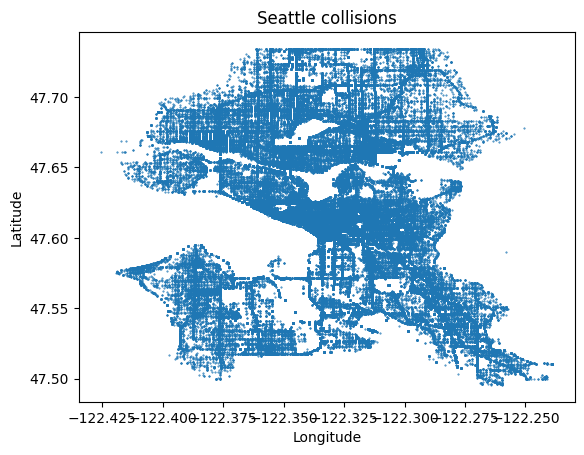

In [7]:
x_axis = data_frame['Longitude']
y_axis = data_frame['Latitude']
#color = lower_48_frame['Average household income, All']

plt.scatter(x_axis, y_axis, s = .2)
plt.title('Seattle collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.rcParams["figure.figsize"] = (5,8.5)
#plt.legend(loc = "lower left")
#plt.colorbar()

plt.show()

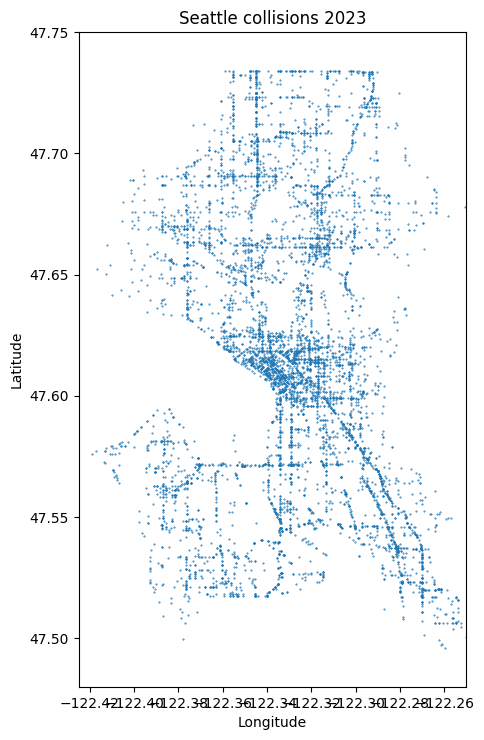

In [8]:
mask_2023 = data_frame['ADDDTTM'].dt.year == 2023

frame_2023 = data_frame[mask_2023]

x_axis = frame_2023['Longitude']
y_axis = frame_2023['Latitude']
#color = lower_48_frame['Average household income, All']

plt.scatter(x_axis, y_axis, s = .2)
plt.title('Seattle collisions 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### These specific values guarantee the same size of the graph values
plt.xlim([-122.425,-122.25])
plt.ylim([47.48,47.75])
    
plt.rcParams["figure.figsize"] = (5,8.5)
#plt.legend(loc = "lower left")
#plt.colorbar()

plt.show()

In [9]:
frame_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7026 entries, 0 to 245801
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   X                 6943 non-null   float64            
 1   Y                 6943 non-null   float64            
 2   OBJECTID          7026 non-null   int64              
 3   SE_ANNO_CAD_DATA  0 non-null      float64            
 4   INCKEY            7026 non-null   int64              
 5   COLDETKEY         7026 non-null   int64              
 6   REPORTNO          7026 non-null   object             
 7   STATUS            7026 non-null   object             
 8   ADDRTYPE          6977 non-null   object             
 9   INTKEY            2960 non-null   float64            
 10  LOCATION          6966 non-null   object             
 11  EXCEPTRSNCODE     226 non-null    object             
 12  EXCEPTRSNDESC     226 non-null    object             
 13  S

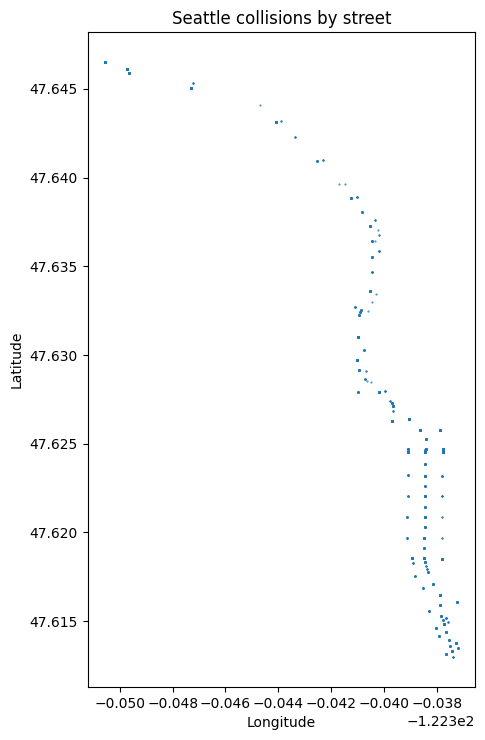

In [10]:
westlake_mask = data_frame['LOCATION'].str.contains('WESTLAKE', na=False)

westlake_frame = data_frame[westlake_mask]

x_axis = westlake_frame['Longitude']
y_axis = westlake_frame['Latitude']
#color = lower_48_frame['Average household income, All']

plt.scatter(x_axis, y_axis, s = .2)
plt.title('Seattle collisions by street')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
### These specific values guarantee the same size of the graph values
#plt.xlim([-122.425,-122.25])
#plt.ylim([47.48,47.75])
    

plt.rcParams["figure.figsize"] = (5,8.5)
#plt.legend(loc = "lower left")
#plt.colorbar()

plt.show()

In [11]:
westlake_frame['PEDCYLCOUNT'].sum()
#westlake_frame.head()

109

In [12]:
total_injuries = data_frame['INJURIES'].sum()
total_incidents = data_frame['OBJECTID'].count()
total_fatalities = data_frame['FATALITIES'].sum()

fatalities_by_year = data_frame.groupby('Year Added').agg({'FATALITIES':'sum'}).reset_index()
fatalities_by_year['fatality_percent_by_year'] = fatalities_by_year['FATALITIES'] / total_fatalities

injuries_by_year = data_frame.groupby('Year Added').agg({'INJURIES':'sum'}).reset_index()
injuries_by_year['injury_percent_by_year'] = injuries_by_year['INJURIES'] / total_injuries

crashes_by_year = data_frame.groupby('Year Added').agg({'OBJECTID':'count'}).reset_index()
crashes_by_year['incident_percent_by_year'] = crashes_by_year['OBJECTID'] / total_incidents

crashes_by_year

,Year Added,OBJECTID,incident_percent_by_year
0,2003,16,0.000065
1,2004,12886,0.052424
2,2005,11368,0.046249
3,2006,22577,0.091850
4,2007,15022,0.061114
5,2008,14135,0.057506
6,2009,13491,0.054886
7,2010,10397,0.042298
8,2011,12180,0.049552
9,2012,12880,0.052400


0.05894736842105263


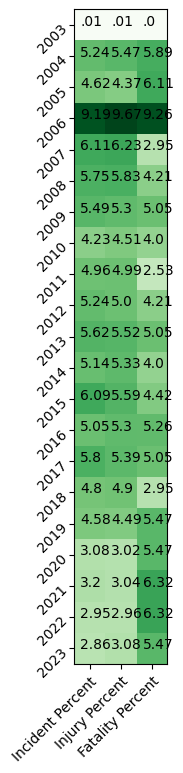

In [13]:
agg_frame = pd.DataFrame()
agg_frame['Total Incidents'] = crashes_by_year['incident_percent_by_year']
agg_frame['Total Injuries'] = injuries_by_year['injury_percent_by_year']
agg_frame['Total Fatalities'] = fatalities_by_year['fatality_percent_by_year']


#injuries_by_year['INJURIES']

#zeroth_col = agg_frame.iloc[:, [0]].iloc[1]

print ((agg_frame.iloc[1,2]))

#print((zeroth_col[0]))

xlabels = ['Incident Percent','Injury Percent', 'Fatality Percent']

#agg_frame
ylist = []
for i in range(21):
    ylist.append(i)

plt.imshow(agg_frame, cmap = 'Greens')
plt.xticks(ticks = [0,1,2], labels = xlabels, ha="right", rotation = 45, rotation_mode = 'anchor')
plt.yticks(ticks = ylist, labels = crashes_by_year['Year Added'], rotation = 45, rotation_mode = 'anchor')

for j in range(len(agg_frame.columns)):
    for i in agg_frame.index:        
        plt.text(j - 0.3, i, str(round(agg_frame.iloc[i,j] * 100, 2)).lstrip('0'))

plt.rcParams["figure.figsize"] = (9,12.5)

plt.show()
#type(crashes_by_year['Year Added'])

In [14]:
#data_frame['UNDERINFL_ints'] = data_frame['UNDERINFL']

data_frame['UNDERINFL_ints'] = data_frame.UNDERINFL.replace({'Y':1, 'N':0})
data_frame['UNDERINFL_ints'] = pd.to_numeric(data_frame['UNDERINFL_ints'])


#data_frame['UNDERINFL_ints'] = data_frame.UNDERINFL.eq('Y')
#influence_mask = data_frame['UNDERINFL'] == '0'

In [15]:
data_frame['UNDERINFL'].value_counts()

N    121218
0     81645
Y      5505
1      4230
Name: UNDERINFL, dtype: int64

In [16]:
data_frame['UNDERINFL_ints'].value_counts()

0.0    202863
1.0      9735
Name: UNDERINFL_ints, dtype: int64

In [17]:
#data_frame['HITPARKEDCAR'].sum()
infl_frame = data_frame.groupby('UNDERINFL_ints').agg({'FATALITIES':'sum'}).reset_index()

infl_frame

,UNDERINFL_ints,FATALITIES
0,0.0,354
1,1.0,104


In [18]:
## 9737 == number of recorded incidents under the influence, 202863 == number of recorded incidents NOT under the influence
#(9735 / (202863 + 9735)) * 100 # == 4.579064713684983 percent of all incidents (with records on the matter) were under the influence.

## 104 == number of fatalities under the influence, 354 == number of fatalities while sober
#(104 / (354 + 104)) * 100 # == 22.707423580786028 percent of all Fatalities (with records on the matter) were under the influence.

##### According to the above calculations, 4.6% of all incidents happened while the driver was under the influence, while 22.7% of all fatalities happened while the driver was under the influence.

In [19]:
data_frame['HITPARKEDCAR'].value_counts()

data_frame['HITPARKEDCAR'] = data_frame['HITPARKEDCAR'].replace({'Y':1, 'N':0})

parked_car_frame = data_frame.groupby('UNDERINFL_ints').agg({'INJURIES': 'mean'}).reset_index()

parked_car_frame

,UNDERINFL_ints,INJURIES
0,0.0,0.413328
1,1.0,0.593015
